<a href="https://colab.research.google.com/github/Aniket23160/dentPredictor/blob/main/DentPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 1.6 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


Front View

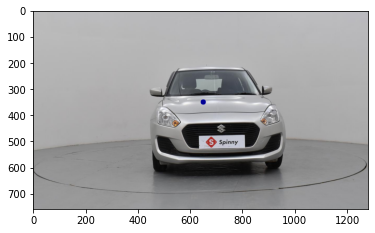

55.636797872941884


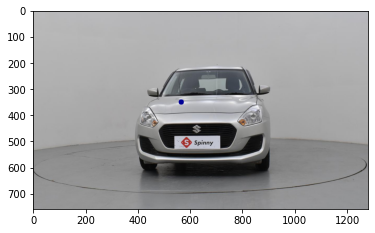

566
350


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import statistics 

imgname = "/content/drive/MyDrive/car.5.jpg"       
imgname2 = "/content/drive/MyDrive/car.1.jpg"   

image = np.array(Image.open('/content/drive/MyDrive/car.5.jpg'))
image2 = np.array(Image.open('/content/drive/MyDrive/car.1.jpg'))

dentpoint_x=600
dentpoint_y=350

image = cv2.circle(image, (650,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image,),plt.show()

sift = cv2.xfeatures2d.SIFT_create()

FLANN_INDEX_KDTREE = 1 
flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
matcher = cv2.FlannBasedMatcher(flann_params, {})

img1 = cv2.imread(imgname)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kpts1, descs1 = sift.detectAndCompute(gray1,None)

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

matches = matcher.knnMatch(descs1, descs2, 2)


dist_lisx=[]
dist_lisy=[]
dist_lis_img2x=[]
dist_lis_img2y=[]
dx=[]
t=0;
t1=0;
matchesMask = [[0,0] for i in range(len(matches))]
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        t=t+(pt1[0]-pt2[0])
        t1=t1+1
        dist_lisx.append((pt1[0]-dentpoint_x)**2)
        dist_lisy.append((pt1[1]-dentpoint_y)**2)
        
t=t/t1
print(t)        
def f(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

dist_lisx.sort()
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        if ((pt1[0]-dentpoint_x)**2<=dist_lisx[50]):
            dist_lis_img2x.append(pt2[0])
        if ((pt1[1]-dentpoint_y)**2<=dist_lisy[50]):
            dist_lis_img2y.append(pt2[1])
            if i % 5 ==0 :
                cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
                cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)
resx = dentpoint_x-int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t))/2) 
# resx=int(dentpoint_x-abs(t))
resy = dentpoint_y


image2 = cv2.circle(image2, (resx,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image2,),plt.show()


draw_params = dict(matchColor = (255, 0,0),
                   singlePointColor = (0,0,255),
                   matchesMask = matchesMask,
                   flags = 0)

print(resx)
print(resy)

# res = cv2.drawMatchesKnn(img1,kpts1,img2,kpts2,matches,None,**draw_params)
# plt.imshow(res,),plt.show()


Back View

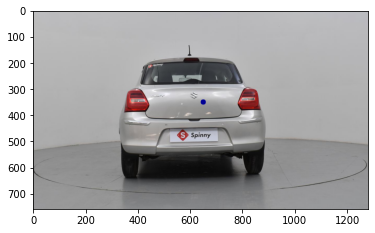

93.4984710926318


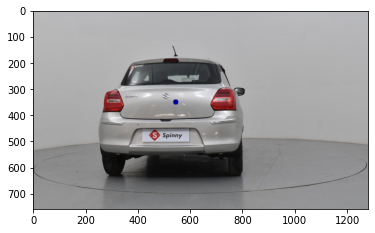

545
350


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import statistics 

imgname = "/content/drive/MyDrive/car.b2.jpg"       
imgname2 = "/content/drive/MyDrive/car.b1.jpg"   

image = np.array(Image.open('/content/drive/MyDrive/car.b2.jpg'))
image2 = np.array(Image.open('/content/drive/MyDrive/car.b1.jpg'))

dentpoint_x=650
dentpoint_y=350

image = cv2.circle(image, (650,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image,),plt.show()

sift = cv2.xfeatures2d.SIFT_create()

FLANN_INDEX_KDTREE = 1 
flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
matcher = cv2.FlannBasedMatcher(flann_params, {})

img1 = cv2.imread(imgname)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kpts1, descs1 = sift.detectAndCompute(gray1,None)

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

matches = matcher.knnMatch(descs1, descs2, 2)


dist_lisx=[]
dist_lisy=[]
dist_lis_img2x=[]
dist_lis_img2y=[]
dx=[]
t=0;
t1=0;
matchesMask = [[0,0] for i in range(len(matches))]
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        t=t+(pt1[0]-pt2[0])
        t1=t1+1
        dist_lisx.append((pt1[0]-dentpoint_x)**2)
        dist_lisy.append((pt1[1]-dentpoint_y)**2)
        
t=t/t1
print(t)        
def f(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

dist_lisx.sort()
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        if ((pt1[0]-dentpoint_x)**2<=dist_lisx[50]):
            dist_lis_img2x.append(pt2[0])
        if ((pt1[1]-dentpoint_y)**2<=dist_lisy[50]):
            dist_lis_img2y.append(pt2[1])
            if i % 5 ==0 :
                cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
                cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)
resx = dentpoint_x-int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t))/2) 
# resx=int(dentpoint_x-abs(t))
resy = dentpoint_y


image2 = cv2.circle(image2, (resx,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image2,),plt.show()


draw_params = dict(matchColor = (255, 0,0),
                   singlePointColor = (0,0,255),
                   matchesMask = matchesMask,
                   flags = 0)

print(resx)
print(resy)

# res = cv2.drawMatchesKnn(img1,kpts1,img2,kpts2,matches,None,**draw_params)
# plt.imshow(res,),plt.show()


Steep Angle Views

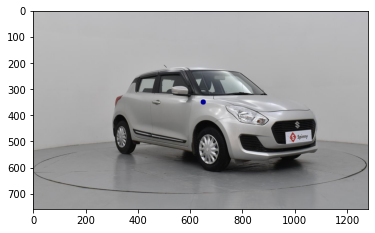

-6.414364554665306


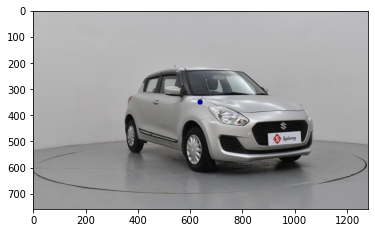

638
350


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import statistics 

imgname = "/content/drive/MyDrive/car.s4.jpg"       
imgname2 = "/content/drive/MyDrive/car.s3.jpg"   

image = np.array(Image.open('/content/drive/MyDrive/car.s4.jpg'))
image2 = np.array(Image.open('/content/drive/MyDrive/car.s3.jpg'))

dentpoint_x=650
dentpoint_y=350

image = cv2.circle(image, (650,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image,),plt.show()

sift = cv2.xfeatures2d.SIFT_create()

FLANN_INDEX_KDTREE = 1 
flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
matcher = cv2.FlannBasedMatcher(flann_params, {})

img1 = cv2.imread(imgname)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kpts1, descs1 = sift.detectAndCompute(gray1,None)

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

matches = matcher.knnMatch(descs1, descs2, 2)


dist_lisx=[]
dist_lisy=[]
dist_lis_img2x=[]
dist_lis_img2y=[]
dx=[]
t=0;
t1=0;
matchesMask = [[0,0] for i in range(len(matches))]
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        t=t+(pt1[0]-pt2[0])
        t1=t1+1
        dist_lisx.append((pt1[0]-dentpoint_x)**2)
        dist_lisy.append((pt1[1]-dentpoint_y)**2)
        
t=t/t1
print(t)        
def f(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

dist_lisx.sort()
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        if ((pt1[0]-dentpoint_x)**2<=dist_lisx[50]):
            dist_lis_img2x.append(pt2[0])
        if ((pt1[1]-dentpoint_y)**2<=dist_lisy[50]):
            dist_lis_img2y.append(pt2[1])
            if i % 5 ==0 :
                cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
                cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)
resx = dentpoint_x-int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t))/2) 
# resx=int(dentpoint_x-abs(t))
resy = dentpoint_y


image2 = cv2.circle(image2, (resx,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image2,),plt.show()


draw_params = dict(matchColor = (255, 0,0),
                   singlePointColor = (0,0,255),
                   matchesMask = matchesMask,
                   flags = 0)

print(resx)
print(resy)

# res = cv2.drawMatchesKnn(img1,kpts1,img2,kpts2,matches,None,**draw_params)
# plt.imshow(res,),plt.show()


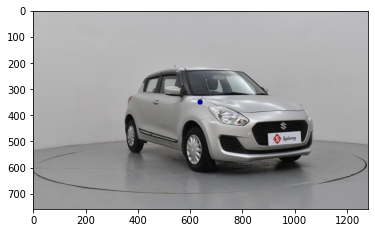

42.925835967063904


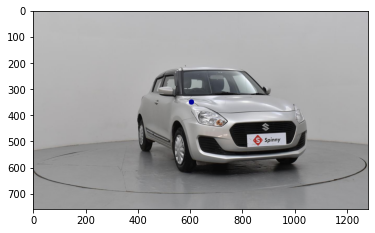

605
350


In [ ]:

import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import statistics 

imgname = "/content/drive/MyDrive/car.s3.jpg"       
imgname2 = "/content/drive/MyDrive/car.s2.jpg"   

image = np.array(Image.open('/content/drive/MyDrive/car.s3.jpg'))
image2 = np.array(Image.open('/content/drive/MyDrive/car.s2.jpg'))

dentpoint_x=638
dentpoint_y=350

image = cv2.circle(image, (638,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image,),plt.show()

sift = cv2.xfeatures2d.SIFT_create()

FLANN_INDEX_KDTREE = 1 
flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
matcher = cv2.FlannBasedMatcher(flann_params, {})

img1 = cv2.imread(imgname)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kpts1, descs1 = sift.detectAndCompute(gray1,None)

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

matches = matcher.knnMatch(descs1, descs2, 2)


dist_lisx=[]
dist_lisy=[]
dist_lis_img2x=[]
dist_lis_img2y=[]
dx=[]
t=0;
t1=0;
matchesMask = [[0,0] for i in range(len(matches))]
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        t=t+(pt1[0]-pt2[0])
        t1=t1+1
        dist_lisx.append((pt1[0]-dentpoint_x)**2)
        dist_lisy.append((pt1[1]-dentpoint_y)**2)
        
t=t/t1
print(t)        
def f(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

dist_lisx.sort()
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        if ((pt1[0]-dentpoint_x)**2<=dist_lisx[50]):
            dist_lis_img2x.append(pt2[0])
        if ((pt1[1]-dentpoint_y)**2<=dist_lisy[50]):
            dist_lis_img2y.append(pt2[1])
            if i % 5 ==0 :
                cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
                cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)
resx = dentpoint_x-int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t))/2) 
# resx=int(dentpoint_x-abs(t))
resy = dentpoint_y


image2 = cv2.circle(image2, (resx,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image2,),plt.show()


draw_params = dict(matchColor = (255, 0,0),
                   singlePointColor = (0,0,255),
                   matchesMask = matchesMask,
                   flags = 0)

print(resx)
print(resy)

# res = cv2.drawMatchesKnn(img1,kpts1,img2,kpts2,matches,None,**draw_params)
# plt.imshow(res,),plt.show()


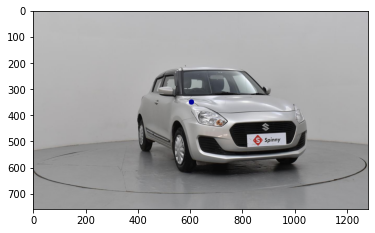

51.4129234596535


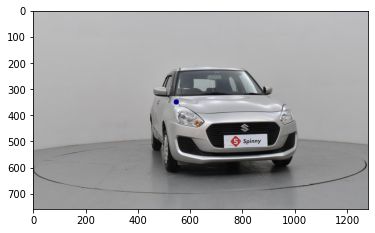

547
350


In [ ]:

import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import statistics 

imgname = "/content/drive/MyDrive/car.s2.jpg"       
imgname2 = "/content/drive/MyDrive/car.s1.jpg"   

image = np.array(Image.open('/content/drive/MyDrive/car.s2.jpg'))
image2 = np.array(Image.open('/content/drive/MyDrive/car.s1.jpg'))

dentpoint_x=605
dentpoint_y=350

image = cv2.circle(image, (605,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image,),plt.show()

sift = cv2.xfeatures2d.SIFT_create()

FLANN_INDEX_KDTREE = 1 
flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
matcher = cv2.FlannBasedMatcher(flann_params, {})

img1 = cv2.imread(imgname)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kpts1, descs1 = sift.detectAndCompute(gray1,None)

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

matches = matcher.knnMatch(descs1, descs2, 2)


dist_lisx=[]
dist_lisy=[]
dist_lis_img2x=[]
dist_lis_img2y=[]
dx=[]
t=0;
t1=0;
matchesMask = [[0,0] for i in range(len(matches))]
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        t=t+(pt1[0]-pt2[0])
        t1=t1+1
        dist_lisx.append((pt1[0]-dentpoint_x)**2)
        dist_lisy.append((pt1[1]-dentpoint_y)**2)
        
t=t/t1
print(t)        
def f(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

dist_lisx.sort()
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        if ((pt1[0]-dentpoint_x)**2<=dist_lisx[50]):
            dist_lis_img2x.append(pt2[0])
        if ((pt1[1]-dentpoint_y)**2<=dist_lisy[50]):
            dist_lis_img2y.append(pt2[1])
            if i % 5 ==0 :
                cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
                cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)
resx = dentpoint_x-int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t))/2) 
# resx=int(dentpoint_x-abs(t))
resy = dentpoint_y


image2 = cv2.circle(image2, (resx,350), radius=10, color=(0, 0, 150), thickness=-1)
plt.imshow(image2,),plt.show()


draw_params = dict(matchColor = (255, 0,0),
                   singlePointColor = (0,0,255),
                   matchesMask = matchesMask,
                   flags = 0)

print(resx)
print(resy)

# res = cv2.drawMatchesKnn(img1,kpts1,img2,kpts2,matches,None,**draw_params)
# plt.imshow(res,),plt.show()


Complete 360 degree view

0
-3.863971539776588


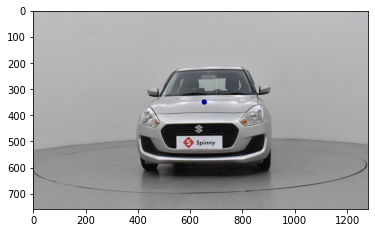

654
350
1
-68.56182389435945


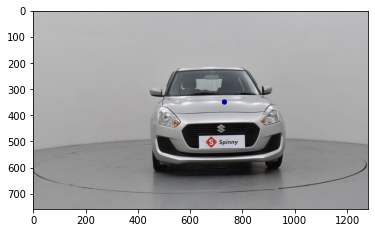

731
350
2
-73.20566448182551


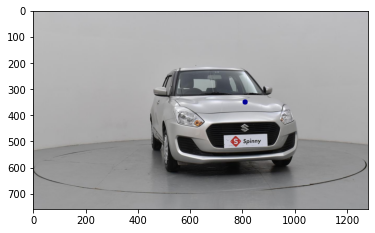

810
350
3
-24.060649138230545


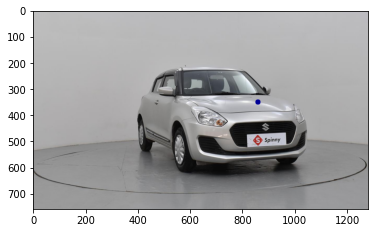

859
350
4
-49.3345253684304


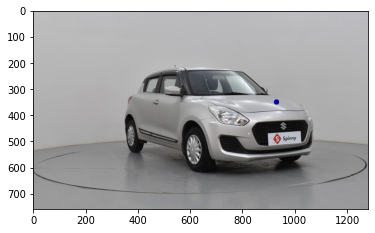

930
350
5


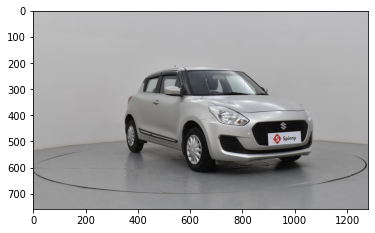

Dent Not Visible
6


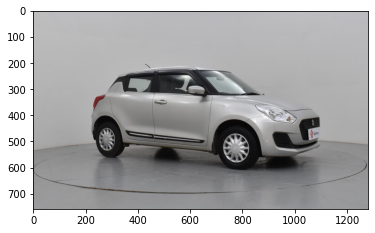

Dent Not Visible
7


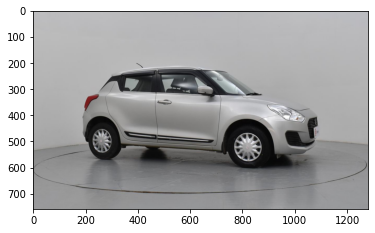

Dent Not Visible
8


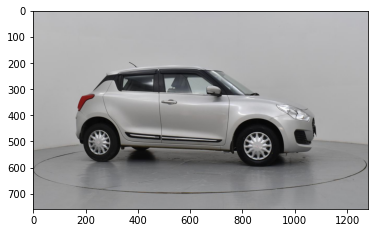

Dent Not Visible
9


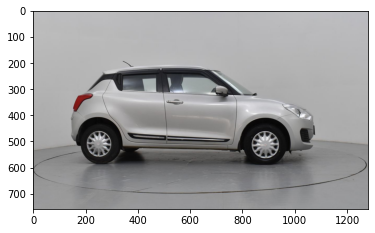

Dent Not Visible
10


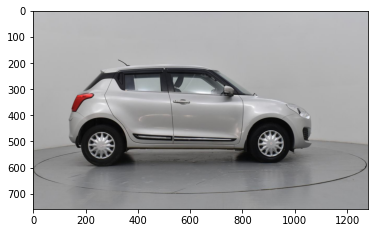

Dent Not Visible
11


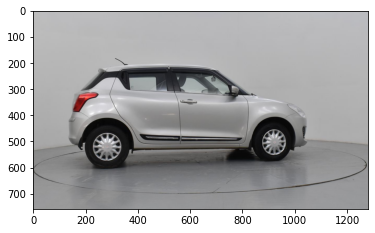

Dent Not Visible
12


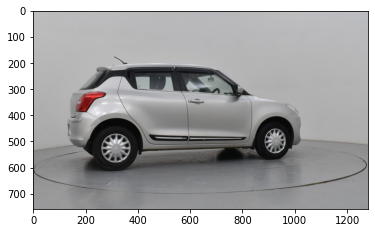

Dent Not Visible
13


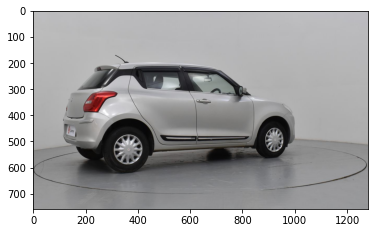

Dent Not Visible
14


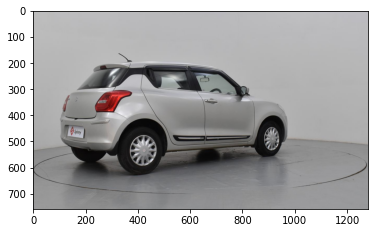

Dent Not Visible
15


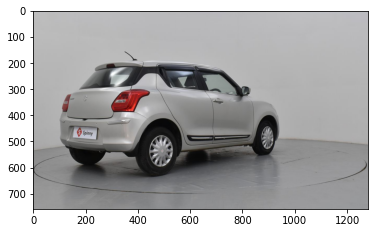

Dent Not Visible
16


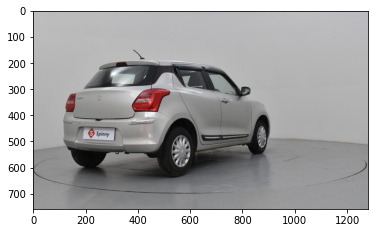

Dent Not Visible
17


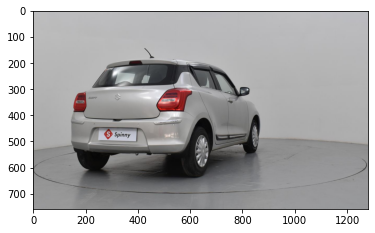

Dent Not Visible
18


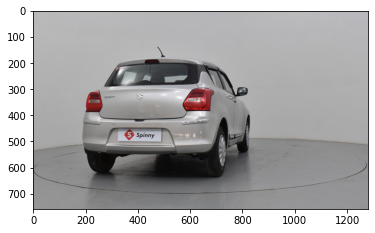

Dent Not Visible
19


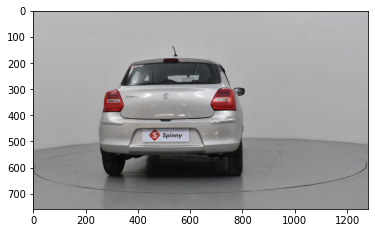

Dent Not Visible
20


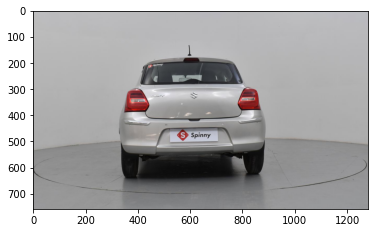

Dent Not Visible
21


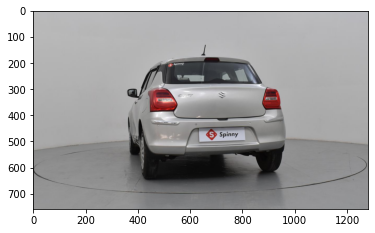

Dent Not Visible
22


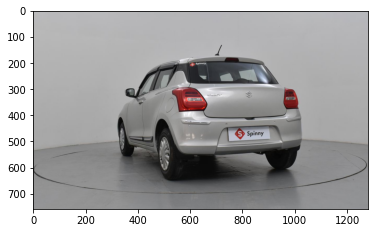

Dent Not Visible
23


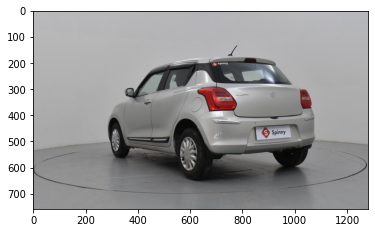

Dent Not Visible
24


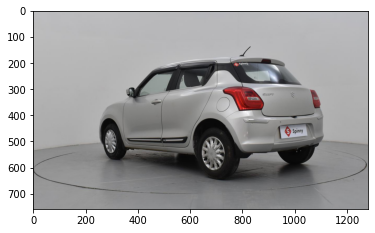

Dent Not Visible
25


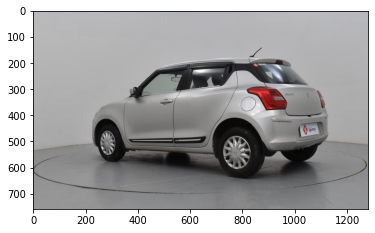

Dent Not Visible
26


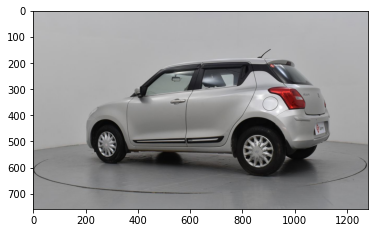

Dent Not Visible
27


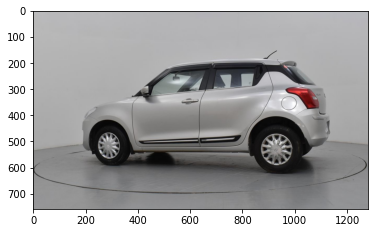

Dent Not Visible
28


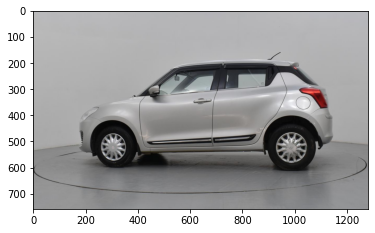

Dent Not Visible
29


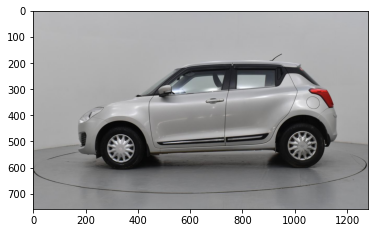

Dent Not Visible
30


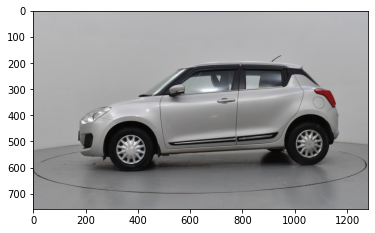

Dent Not Visible
31


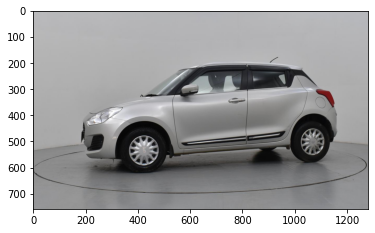

Dent Not Visible
32


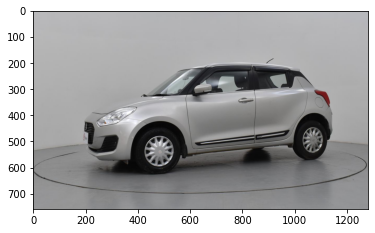

Dent Not Visible
33


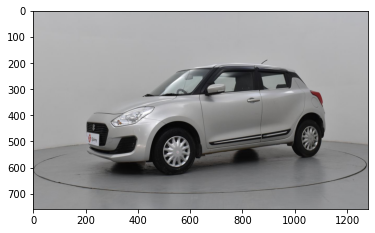

Dent Not Visible
34


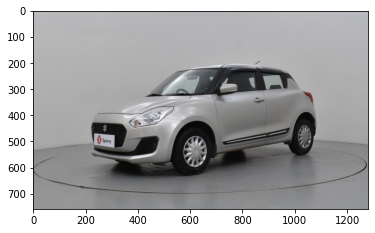

Dent Not Visible
35
-3.6881729446294655


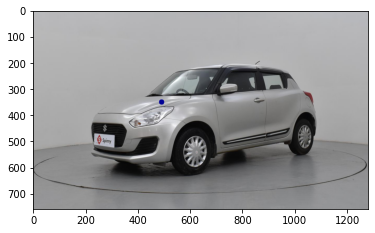

909
350
36
17.479941159202937


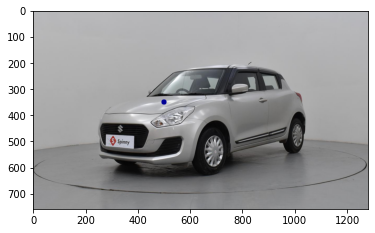

900
350
37
18.478702554750683


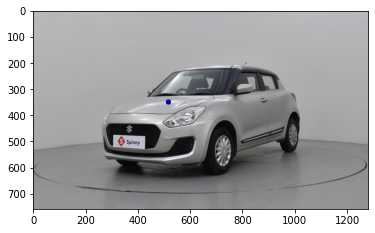

883
350
38
24.83193304677489


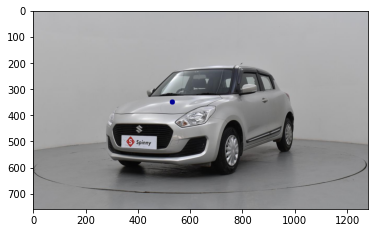

868
350
39
19.30513387231783


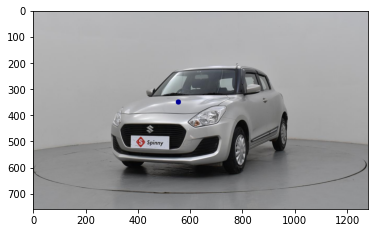

845
350
40
71.27140197683784


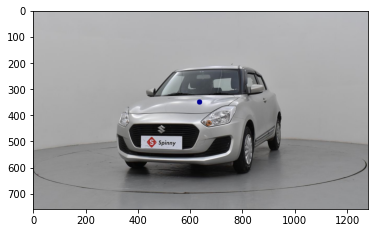

764
350


In [ ]:
!pip install opencv-contrib-python==3.4.2.17
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import statistics 
import urllib.request
from PIL import Image
  

urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c0.jpg',"c0.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c1.jpg',"c1.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c2.jpg',"c2.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c3.jpg',"c3.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c4.jpg',"c4.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c5.jpg',"c5.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c6.jpg',"c6.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c7.jpg',"c7.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c8.jpg',"c8.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c9.jpg',"c9.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c10.jpg',"c10.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c11.jpg',"c11.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c12.jpg',"c12.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c13.jpg',"c13.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c14.jpg',"c14.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c15.jpg',"c15.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c16.jpg',"c16.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c17.jpg',"c17.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c18.jpg',"c18.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c19.jpg',"c19.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c20.jpg',"c20.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c21.jpg',"c21.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c22.jpg',"c22.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c23.jpg',"c23.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c24.jpg',"c24.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c25.jpg',"c25.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c26.jpg',"c26.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c27.jpg',"c27.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c28.jpg',"c28.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c29.jpg',"c29.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c30.jpg',"c30.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c31.jpg',"c31.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c32.jpg',"c32.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c33.jpg',"c33.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c34.jpg',"c34.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c35.jpg',"c35.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c36.jpg',"c36.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c37.jpg',"c37.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c38.jpg',"c38.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c39.jpg',"c39.jpg")
urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c40.jpg',"c40.jpg")  

def imagesimport():
    images=[]
    
    images.append(np.array(Image.open("c0.jpg")))
    images.append(np.array(Image.open("c1.jpg")))
    images.append(np.array(Image.open("c2.jpg")))
    images.append(np.array(Image.open("c3.jpg")))
    images.append(np.array(Image.open("c4.jpg")))
    images.append(np.array(Image.open("c5.jpg")))
    images.append(np.array(Image.open("c6.jpg")))
    images.append(np.array(Image.open("c7.jpg")))
    images.append(np.array(Image.open("c8.jpg")))
    images.append(np.array(Image.open("c9.jpg")))
    images.append(np.array(Image.open("c10.jpg")))
    images.append(np.array(Image.open("c11.jpg")))
    images.append(np.array(Image.open("c12.jpg")))
    images.append(np.array(Image.open("c13.jpg")))
    images.append(np.array(Image.open("c14.jpg")))
    images.append(np.array(Image.open("c15.jpg")))
    images.append(np.array(Image.open("c16.jpg")))
    images.append(np.array(Image.open("c17.jpg")))
    images.append(np.array(Image.open("c18.jpg")))
    images.append(np.array(Image.open("c19.jpg")))
    images.append(np.array(Image.open("c20.jpg")))
    images.append(np.array(Image.open("c21.jpg")))
    images.append(np.array(Image.open("c22.jpg")))
    images.append(np.array(Image.open("c23.jpg")))
    images.append(np.array(Image.open("c24.jpg")))
    images.append(np.array(Image.open("c25.jpg")))
    images.append(np.array(Image.open("c26.jpg")))
    images.append(np.array(Image.open("c27.jpg")))
    images.append(np.array(Image.open("c28.jpg")))
    images.append(np.array(Image.open("c29.jpg")))
    images.append(np.array(Image.open("c30.jpg")))
    images.append(np.array(Image.open("c31.jpg")))
    images.append(np.array(Image.open("c32.jpg")))
    images.append(np.array(Image.open("c33.jpg")))
    images.append(np.array(Image.open("c34.jpg")))
    images.append(np.array(Image.open("c35.jpg")))
    images.append(np.array(Image.open("c36.jpg")))
    images.append(np.array(Image.open("c37.jpg")))
    images.append(np.array(Image.open("c38.jpg")))
    images.append(np.array(Image.open("c39.jpg")))
    images.append(np.array(Image.open("c40.jpg")))
    return images
def imgimport():
    img=[]
    img.append("c0.jpg")
    img.append("c1.jpg")
    img.append("c2.jpg")
    img.append("c3.jpg")
    img.append("c4.jpg")
    img.append("c5.jpg")
    img.append("c6.jpg")
    img.append("c7.jpg")
    img.append("c8.jpg")
    img.append("c9.jpg")
    img.append("c10.jpg")
    img.append("c11.jpg")
    img.append("c12.jpg")
    img.append("c13.jpg")
    img.append("c14.jpg")
    img.append("c15.jpg")
    img.append("c16.jpg")
    img.append("c17.jpg")
    img.append("c18.jpg")
    img.append("c19.jpg")
    img.append("c20.jpg")
    img.append("c21.jpg")
    img.append("c22.jpg")
    img.append("c23.jpg")
    img.append("c24.jpg")
    img.append("c25.jpg")
    img.append("c26.jpg")
    img.append("c27.jpg")
    img.append("c28.jpg")
    img.append("c29.jpg")
    img.append("c30.jpg")
    img.append("c31.jpg")
    img.append("c32.jpg")
    img.append("c33.jpg")
    img.append("c34.jpg")
    img.append("c35.jpg")
    img.append("c36.jpg")
    img.append("c37.jpg")
    img.append("c38.jpg")
    img.append("c39.jpg")
    img.append("c40.jpg")
    return img

def plotDent2(imgname,imgname2,image,image2,dent):
    dentpoint_x=dent[0]
    dentpoint_y=dent[1]
    sift = cv2.xfeatures2d.SIFT_create()

    FLANN_INDEX_KDTREE = 1 
    flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    matcher = cv2.FlannBasedMatcher(flann_params, {})

    img1 = cv2.imread(imgname)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    kpts1, descs1 = sift.detectAndCompute(gray1,None)

    img2 = cv2.imread(imgname2)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    kpts2, descs2 = sift.detectAndCompute(gray2,None)

    matches = matcher.knnMatch(descs1, descs2, 2)

    dist_lisx=[]
    dist_lisy=[]
    dist_lis_img2x=[]
    dist_lis_img2y=[]
    dx=[]
    t=0;
    t1=0;
    matchesMask = [[0,0] for i in range(len(matches))]
    for i, (m1,m2) in enumerate(matches):
        if m1.distance < 0.7 * m2.distance:
            matchesMask[i] = [1,0]
            pt1 = kpts1[m1.queryIdx].pt
            pt2 = kpts2[m1.trainIdx].pt
            t=t+(pt1[0]-pt2[0])
            t1=t1+1
            dist_lisx.append((pt1[0]-dentpoint_x)**2)
            dist_lisy.append((pt1[1]-dentpoint_y)**2)
        
    t=t/t1
    print(t)        
    def f(numbers):
        return float(sum(numbers)) / max(len(numbers), 1)

    dist_lisx.sort()
    for i, (m1,m2) in enumerate(matches):
        if m1.distance < 0.7 * m2.distance:
            matchesMask[i] = [1,0]
            pt1 = kpts1[m1.queryIdx].pt
            pt2 = kpts2[m1.trainIdx].pt
            if ((pt1[0]-dentpoint_x)**2<=dist_lisx[20]):
                dist_lis_img2x.append(pt2[0])
            if ((pt1[1]-dentpoint_y)**2<=dist_lisy[20]):
                dist_lis_img2y.append(pt2[1])
                if i % 5 ==0 :
                    cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
                    cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)
    temp = 2*700-(dentpoint_x-int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t))/2))
    resx = (dentpoint_x-int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t))/2)) 
    resy = dentpoint_y


    image2 = cv2.circle(image2, (temp,350), radius=10, color=(0, 0, 150), thickness=-1)
    plt.imshow(image2,),plt.show()
    print(resx)
    print(resy)
    dent[0]=resx
    dent[1]=resy
    return dent


def plotDent(imgname,imgname2,image,image2,dent):
    dentpoint_x=dent[0]
    dentpoint_y=dent[1]
    sift = cv2.xfeatures2d.SIFT_create()

    FLANN_INDEX_KDTREE = 1 
    flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    matcher = cv2.FlannBasedMatcher(flann_params, {})

    img1 = cv2.imread(imgname)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    kpts1, descs1 = sift.detectAndCompute(gray1,None)

    img2 = cv2.imread(imgname2)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    kpts2, descs2 = sift.detectAndCompute(gray2,None)

    matches = matcher.knnMatch(descs1, descs2, 2)

    dist_lisx=[]
    dist_lisy=[]
    dist_lis_img2x=[]
    dist_lis_img2y=[]
    dx=[]
    t=0;
    t1=0;
    matchesMask = [[0,0] for i in range(len(matches))]
    for i, (m1,m2) in enumerate(matches):
        if m1.distance < 0.7 * m2.distance:
            matchesMask[i] = [1,0]
            pt1 = kpts1[m1.queryIdx].pt
            pt2 = kpts2[m1.trainIdx].pt
            t=t+(pt1[0]-pt2[0])
            t1=t1+1
            dist_lisx.append((pt1[0]-dentpoint_x)**2)
            dist_lisy.append((pt1[1]-dentpoint_y)**2)
        
    t=t/t1
    print(t)        
    def f(numbers):
        return float(sum(numbers)) / max(len(numbers), 1)

    dist_lisx.sort()
    for i, (m1,m2) in enumerate(matches):
        if m1.distance < 0.7 * m2.distance:
            matchesMask[i] = [1,0]
            pt1 = kpts1[m1.queryIdx].pt
            pt2 = kpts2[m1.trainIdx].pt
            if ((pt1[0]-dentpoint_x)**2<=dist_lisx[20]):
                dist_lis_img2x.append(pt2[0])
            if ((pt1[1]-dentpoint_y)**2<=dist_lisy[20]):
                dist_lis_img2y.append(pt2[1])
                if i % 5 ==0 :
                    cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
                    cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)
    resx = dentpoint_x+int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t))/2) 
    resy = dentpoint_y


    image2 = cv2.circle(image2, (resx,350), radius=10, color=(0, 0, 150), thickness=-1)
    plt.imshow(image2,),plt.show()
    print(resx)
    print(resy)
    dent[0]=resx
    dent[1]=resy
    return dent

images=imagesimport()
img=imgimport()
visibleIndex=6
t=int(len(images))
dent=[]
dent.append(650)
dent.append(350)
for i in range(t):
    print(i)
    if i<visibleIndex-1:
        imgname = img[i]      
        imgname2 =img[i+1] 
        dent=plotDent(img[i],img[i+1],images[i],images[i+1],dent)
    elif i>len(images)-visibleIndex-1:
        dent=plotDent2(img[i],img[i-1],images[i],images[i-1],dent)
    else:
        plt.imshow(images[i]),plt.show()
        print("Dent Not Visible")
    images=imagesimport()
    img=imgimport()


# Complete View Over User inputs

     |████████████████████████████████| 30.6 MB 2.0 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


Sideview


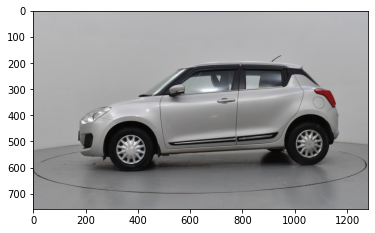

Front


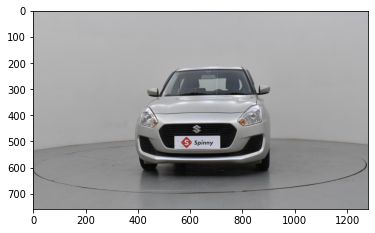

Back


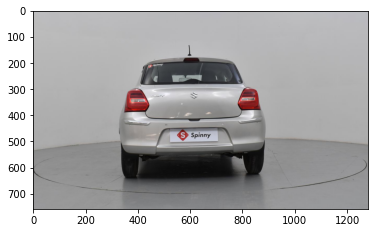


Enter the side of view of dent point image 
 (S for sideview, F for front and B for back)
S
Mark the point of dent in above image
X coordinate450
Y coordinate600
0
Me
-14.700854733693514


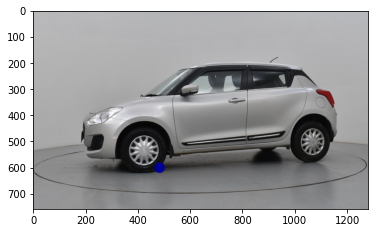

483
600
1
Me
-28.14483374043515


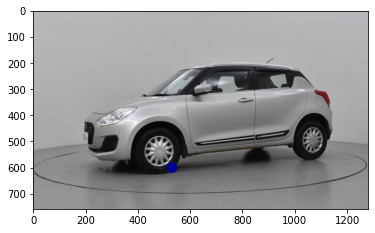

531
600
2
Me
-2.9842187958474486


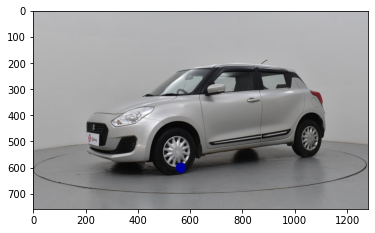

565
600
3
Me
-19.009597778320312


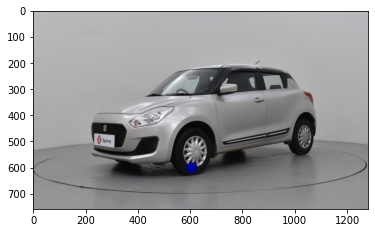

608
600
4
Me
-7.51478150084212


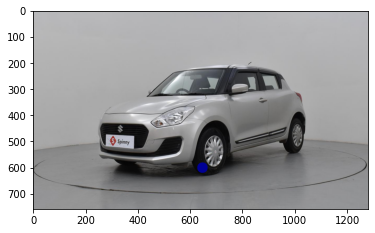

647
600
5


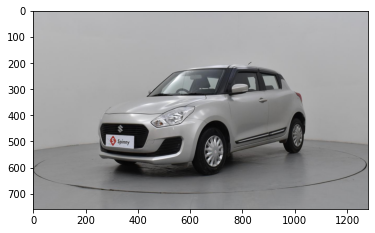

6


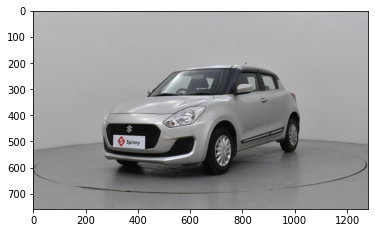

7


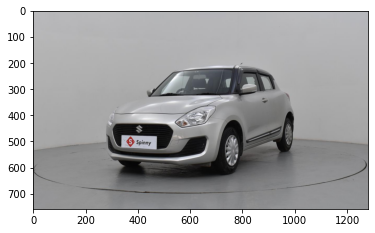

8


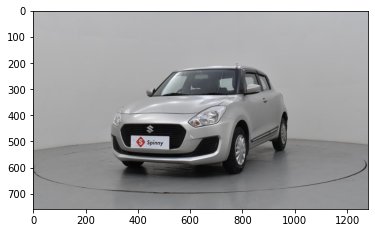

9


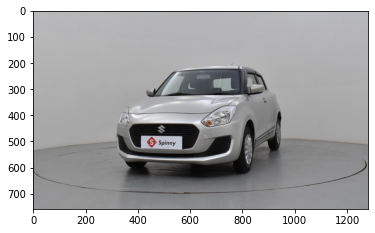

10


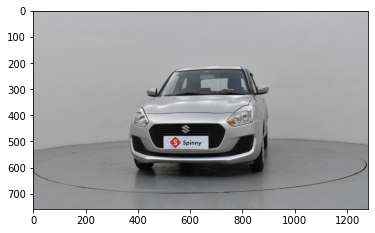

11


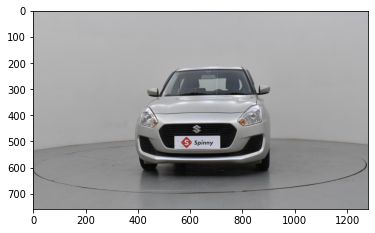

12


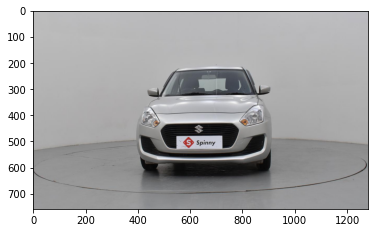

13


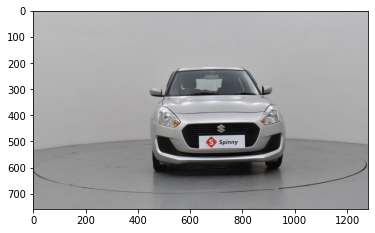

14


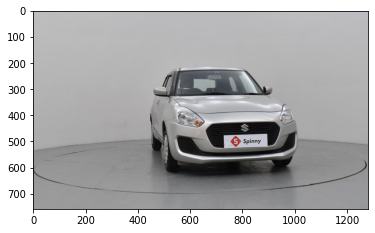

15


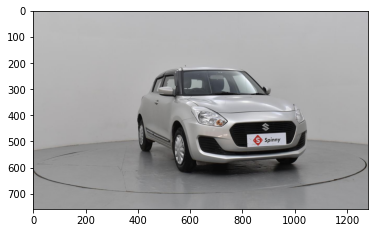

16


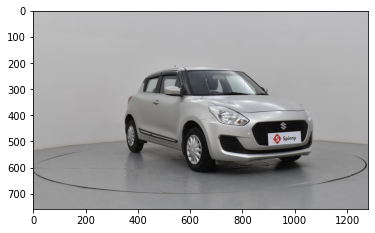

17


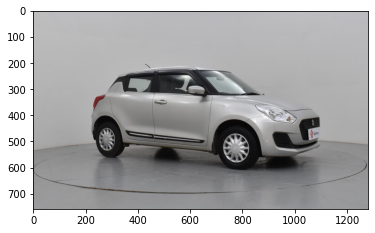

18


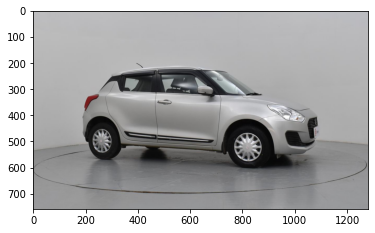

19


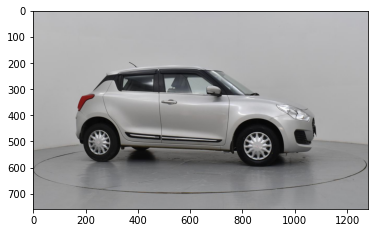

20


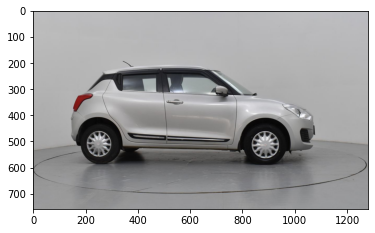

21


In [ ]:
!pip install opencv-contrib-python==3.4.2.17
import urllib.request
from PIL import Image
import math  
urllib.request.urlretrieve(
  'https://media.geeksforgeeks.org/wp-content/uploads/20210318103632/gfg-300x300.png',
   "gfg.png")
  
img = Image.open("gfg.png")
img.show()

import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import statistics 
# https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c0.jpg
def imagesimport():
    images=[]
    
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c0.jpg',"c0.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c1.jpg',"c1.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c2.jpg',"c2.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c3.jpg',"c3.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c4.jpg',"c4.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c5.jpg',"c5.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c6.jpg',"c6.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c7.jpg',"c7.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c8.jpg',"c8.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c9.jpg',"c9.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c10.jpg',"c10.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c11.jpg',"c11.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c12.jpg',"c12.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c13.jpg',"c13.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c14.jpg',"c14.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c15.jpg',"c15.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c16.jpg',"c16.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c17.jpg',"c17.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c18.jpg',"c18.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c19.jpg',"c19.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c20.jpg',"c20.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c21.jpg',"c21.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c22.jpg',"c22.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c23.jpg',"c23.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c24.jpg',"c24.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c25.jpg',"c25.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c26.jpg',"c26.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c27.jpg',"c27.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c28.jpg',"c28.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c29.jpg',"c29.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c30.jpg',"c30.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c31.jpg',"c31.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c32.jpg',"c32.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c33.jpg',"c33.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c34.jpg',"c34.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c35.jpg',"c35.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c36.jpg',"c36.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c37.jpg',"c37.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c38.jpg',"c38.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c39.jpg',"c39.jpg")
    urllib.request.urlretrieve('https://raw.githubusercontent.com/Aniket23160/dentPredictor/main/c40.jpg',"c40.jpg")
    images.append(np.array(Image.open("c0.jpg")))
    images.append(np.array(Image.open("c1.jpg")))
    images.append(np.array(Image.open("c2.jpg")))
    images.append(np.array(Image.open("c3.jpg")))
    images.append(np.array(Image.open("c4.jpg")))
    images.append(np.array(Image.open("c5.jpg")))
    images.append(np.array(Image.open("c6.jpg")))
    images.append(np.array(Image.open("c7.jpg")))
    images.append(np.array(Image.open("c8.jpg")))
    images.append(np.array(Image.open("c9.jpg")))
    images.append(np.array(Image.open("c10.jpg")))
    images.append(np.array(Image.open("c11.jpg")))
    images.append(np.array(Image.open("c12.jpg")))
    images.append(np.array(Image.open("c13.jpg")))
    images.append(np.array(Image.open("c14.jpg")))
    images.append(np.array(Image.open("c15.jpg")))
    images.append(np.array(Image.open("c16.jpg")))
    images.append(np.array(Image.open("c17.jpg")))
    images.append(np.array(Image.open("c18.jpg")))
    images.append(np.array(Image.open("c19.jpg")))
    images.append(np.array(Image.open("c20.jpg")))
    images.append(np.array(Image.open("c21.jpg")))
    images.append(np.array(Image.open("c22.jpg")))
    images.append(np.array(Image.open("c23.jpg")))
    images.append(np.array(Image.open("c24.jpg")))
    images.append(np.array(Image.open("c25.jpg")))
    images.append(np.array(Image.open("c26.jpg")))
    images.append(np.array(Image.open("c27.jpg")))
    images.append(np.array(Image.open("c28.jpg")))
    images.append(np.array(Image.open("c29.jpg")))
    images.append(np.array(Image.open("c30.jpg")))
    images.append(np.array(Image.open("c31.jpg")))
    images.append(np.array(Image.open("c32.jpg")))
    images.append(np.array(Image.open("c33.jpg")))
    images.append(np.array(Image.open("c34.jpg")))
    images.append(np.array(Image.open("c35.jpg")))
    images.append(np.array(Image.open("c36.jpg")))
    images.append(np.array(Image.open("c37.jpg")))
    images.append(np.array(Image.open("c38.jpg")))
    images.append(np.array(Image.open("c39.jpg")))
    images.append(np.array(Image.open("c40.jpg")))
    return images
def imgimport():
    img=[]
    img.append("c0.jpg")
    img.append("c1.jpg")
    img.append("c2.jpg")
    img.append("c3.jpg")
    img.append("c4.jpg")
    img.append("c5.jpg")
    img.append("c6.jpg")
    img.append("c7.jpg")
    img.append("c8.jpg")
    img.append("c9.jpg")
    img.append("c10.jpg")
    img.append("c11.jpg")
    img.append("c12.jpg")
    img.append("c13.jpg")
    img.append("c14.jpg")
    img.append("c15.jpg")
    img.append("c16.jpg")
    img.append("c17.jpg")
    img.append("c18.jpg")
    img.append("c19.jpg")
    img.append("c20.jpg")
    img.append("c21.jpg")
    img.append("c22.jpg")
    img.append("c23.jpg")
    img.append("c24.jpg")
    img.append("c25.jpg")
    img.append("c26.jpg")
    img.append("c27.jpg")
    img.append("c28.jpg")
    img.append("c29.jpg")
    img.append("c30.jpg")
    img.append("c31.jpg")
    img.append("c32.jpg")
    img.append("c33.jpg")
    img.append("c34.jpg")
    img.append("c35.jpg")
    img.append("c36.jpg")
    img.append("c37.jpg")
    img.append("c38.jpg")
    img.append("c39.jpg")
    img.append("c40.jpg")
    return img


def plotDent2(imgname,imgname2,image,image2,dent):
    dentpoint_x=dent[0]
    dentpoint_y=dent[1]
    sift = cv2.xfeatures2d.SIFT_create()

    FLANN_INDEX_KDTREE = 1 
    flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    matcher = cv2.FlannBasedMatcher(flann_params, {})

    img1 = cv2.imread(imgname)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    kpts1, descs1 = sift.detectAndCompute(gray1,None)

    img2 = cv2.imread(imgname2)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    kpts2, descs2 = sift.detectAndCompute(gray2,None)

    matches = matcher.knnMatch(descs1, descs2, 2)

    dist_lisx=[]
    dist_lisy=[]
    dist_lis_img2x=[]
    dist_lis_img2y=[]
    dx=[]
    t=0;
    t1=0;
    matchesMask = [[0,0] for i in range(len(matches))]
    for i, (m1,m2) in enumerate(matches):
        if m1.distance < 0.7 * m2.distance:
            matchesMask[i] = [1,0]
            pt1 = kpts1[m1.queryIdx].pt
            pt2 = kpts2[m1.trainIdx].pt
            t=t+(pt1[0]-pt2[0])
            t1=t1+1
            dist_lisx.append((pt1[0]-dentpoint_x)**2)
            dist_lisy.append((pt1[1]-dentpoint_y)**2)
        
    t=t/t1
    print(t)        
    def f(numbers):
        return float(sum(numbers)) / max(len(numbers), 1)

    dist_lisx.sort()
    for i, (m1,m2) in enumerate(matches):
        if m1.distance < 0.7 * m2.distance:
            matchesMask[i] = [1,0]
            pt1 = kpts1[m1.queryIdx].pt
            pt2 = kpts2[m1.trainIdx].pt
            if ((pt1[0]-dentpoint_x)**2<=dist_lisx[20]):
                dist_lis_img2x.append(pt2[0])
            if ((pt1[1]-dentpoint_y)**2<=dist_lisy[20]):
                dist_lis_img2y.append(pt2[1])
                if i % 5 ==0 :
                    cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
                    cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)
    # f3=abs(centre-dentpoint_x)/math.cos(9)  
    if dentpoint_x>centre:
        resx = dentpoint_x-int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t)+dent[2])/3) 
    else:    
        resx = dentpoint_x+int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t)+dent[2])/3) 
    # resx = dentpoint_x+int(dent[2]) 
    resy = dentpoint_y
    # dent[2]=dent[2]+10

    image2 = cv2.circle(image2, (resx,dentpoint_y), radius=20, color=(0, 0, 150), thickness=-1)
    plt.imshow(image2,),plt.show()
    print(resx)
    print(resy)
    dent[0]=resx
    dent[1]=resy
    return dent

def plotDent(imgname,imgname2,image,image2,dent):
    dentpoint_x=dent[0]
    dentpoint_y=dent[1]
    sift = cv2.xfeatures2d.SIFT_create()

    FLANN_INDEX_KDTREE = 1 
    flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    matcher = cv2.FlannBasedMatcher(flann_params, {})

    img1 = cv2.imread(imgname)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    kpts1, descs1 = sift.detectAndCompute(gray1,None)

    img2 = cv2.imread(imgname2)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    kpts2, descs2 = sift.detectAndCompute(gray2,None)

    matches = matcher.knnMatch(descs1, descs2, 2)

    dist_lisx=[]
    dist_lisy=[]
    dist_lis_img2x=[]
    dist_lis_img2y=[]
    dx=[]
    t=0;
    t1=0;
    matchesMask = [[0,0] for i in range(len(matches))]
    for i, (m1,m2) in enumerate(matches):
        if m1.distance < 0.7 * m2.distance:
            matchesMask[i] = [1,0]
            pt1 = kpts1[m1.queryIdx].pt
            pt2 = kpts2[m1.trainIdx].pt
            t=t+(pt1[0]-pt2[0])
            t1=t1+1
            dist_lisx.append((pt1[0]-dentpoint_x)**2)
            dist_lisy.append((pt1[1]-dentpoint_y)**2)
        
    t=t/t1
    print(t)        
    def f(numbers):
        return float(sum(numbers)) / max(len(numbers), 1)

    dist_lisx.sort()
    for i, (m1,m2) in enumerate(matches):
        if m1.distance < 0.7 * m2.distance:
            matchesMask[i] = [1,0]
            pt1 = kpts1[m1.queryIdx].pt
            pt2 = kpts2[m1.trainIdx].pt
            if ((pt1[0]-dentpoint_x)**2<=dist_lisx[20]):
                dist_lis_img2x.append(pt2[0])
            if ((pt1[1]-dentpoint_y)**2<=dist_lisy[20]):
                dist_lis_img2y.append(pt2[1])
                if i % 5 ==0 :
                    cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
                    cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)
    # f3=abs(centre-dentpoint_x)/math.cos(9)  

    resx = dentpoint_x+int((abs(f(dist_lis_img2x)-dentpoint_x)+abs(t)+dent[2])/3) 
    # resx = dentpoint_x+int(dent[2]) 
    resy = dentpoint_y
    # dent[2]=dent[2]+10

    image2 = cv2.circle(image2, (resx,dentpoint_y), radius=20, color=(0, 0, 150), thickness=-1)
    plt.imshow(image2,),plt.show()
    print(resx)
    print(resy)
    dent[0]=resx
    dent[1]=resy
    return dent


images=imagesimport()
img=imgimport()    
print("\n")
print("Sideview")
plt.imshow(images[30]),plt.show()
print("Front")
plt.imshow(images[0]),plt.show()
print("Back")
plt.imshow(images[20]),plt.show()
print("\nEnter the side of view of dent point image \n (S for sideview, F for front and B for back)")
query_side=input("")
shift=0;
if(query_side=='S'):
    shift=30
elif(query_side=='F'):
    shift=0
elif(query_side=='B'):
    shift=20
else:
    print("Incorrect Input")
print("Mark the point of dent in above image")
x=int(input("X coordinate"))
y=int(input("Y coordinate"))
     
fa=int(abs(y-400)/4) 
if query_side=='F':
    fa=50+int(abs(y-400)/2)    
elif (query_side=='B'):
    fa=125    
centre=650
visibleIndex=5
t=int(len(images))
dent=[]
dent.append(x)
dent.append(y)
dent.append(fa)

if query_side=='F' or query_side=='B':
    for i in range(t):
        if i>20:
            break
        print(i)
        if i<visibleIndex:
            imgname = img[(shift+i)%(len(images))]      
            imgname2 =img[(shift+i)%(len(images))+1] 
        # dent[2]=dent[2]+i*3
            print("Me")
            dent=plotDent(img[(shift+i)%(len(images))],img[(shift+i)%(len(images))+1],images[(shift+i)%(len(images))],images[(shift+i)%(len(images))+1],dent)
            images=imagesimport()
            img=imgimport()
        elif i>len(images)-visibleIndex-1:
            dent=plotDent2(img[(shift+i)%(len(images))],img[(shift+i)%(len(images))-1],images[(shift+i)%(len(images))],images[(shift+i)%(len(images))-1],dent)
            images=imagesimport()
            img=imgimport()
        else:
            plt.imshow(images[(shift+i)%(len(images))]),plt.show()
else:
    for i in range(t):
        print(i)
        if i>20:
            break
        if i<visibleIndex:
            imgname = img[(shift+i)%(len(images))]      
            imgname2 =img[(shift+i)%(len(images))+1] 
        # dent[2]=dent[2]+i*3
            print("Me")
            dent=plotDent2(img[(shift+i)%(len(images))],img[(shift+i)%(len(images))+1],images[(shift+i)%(len(images))],images[(shift+i)%(len(images))+1],dent)
            images=imagesimport()
            img=imgimport()
        elif i>len(images)-visibleIndex-1:
            dent=plotDent(img[(shift+i)%(len(images))],img[(shift+i)%(len(images))-1],images[(shift+i)%(len(images))],images[(shift+i)%(len(images))-1],dent)
            images=imagesimport()
            img=imgimport()
        else:
            plt.imshow(images[(shift+i)%(len(images))]),plt.show()
    
